In [1]:
#Import libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline 

In [2]:
#read in data 
top250 = pd.read_csv('Top250.csv')

## Initial Inspection of Data 

## Top250 Restaurants

Motivation for exploring this dataset would be to discover the folllowing:

-  What are the top ranking restaurants? 
-  What style/type of food do top ranking restaurants mainly serve?
-  How many units do they sell?
-  What are the yearly sales?
-  Are the restaurants yearly sale increasing or decreasing? 

In [3]:
top250

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


In [4]:
top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [5]:
top250.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

-----

In [6]:
top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


## Clean Data 

- We ca drop Content and Headquarters data as many values are missing and not needed to complete our analysis.
- YOY_Sales remove the % sign and convert to float 

In [7]:
top250 = top250.drop('Content',axis=1)
top250 = top250.drop('Headquarters', axis = 1)

In [8]:
top250['YOY_Sales']=top250['YOY_Sales'].str.strip('%')
top250['YOY_Sales']=top250['YOY_Sales'].astype(float)

In [9]:
top250.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2%,Quick Service & Burger


## EDA Process

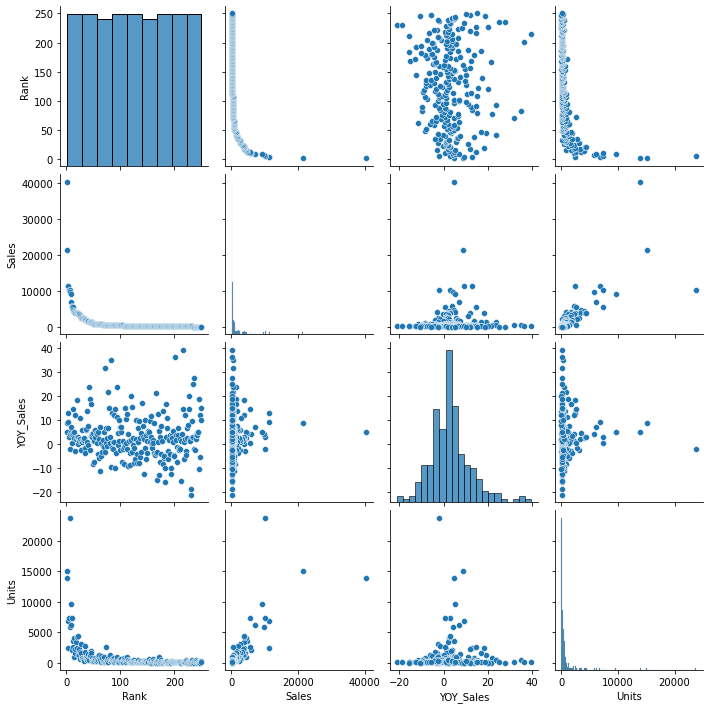

In [10]:
sns.pairplot(top250);

In [11]:
# Lets explore the top 20 restaurant 
top20 = top250[:20]

In [12]:
top20

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2%,Quick Service & Burger
5,6,Subway,10200,-2.0,23801,-4.0%,Quick Service & Sandwich
6,7,Wendy's,9762,4.2,5852,0.7%,Quick Service & Burger
7,8,Dunkin',9228,5.0,9630,2.2%,Quick Service & Coffee Cafe
8,9,Domino's,7044,6.9,6126,4.3%,Quick Service & Pizza
9,10,Panera Bread,5890,4.0,2160,3.2%,Fast Casual & Bakery Cafe


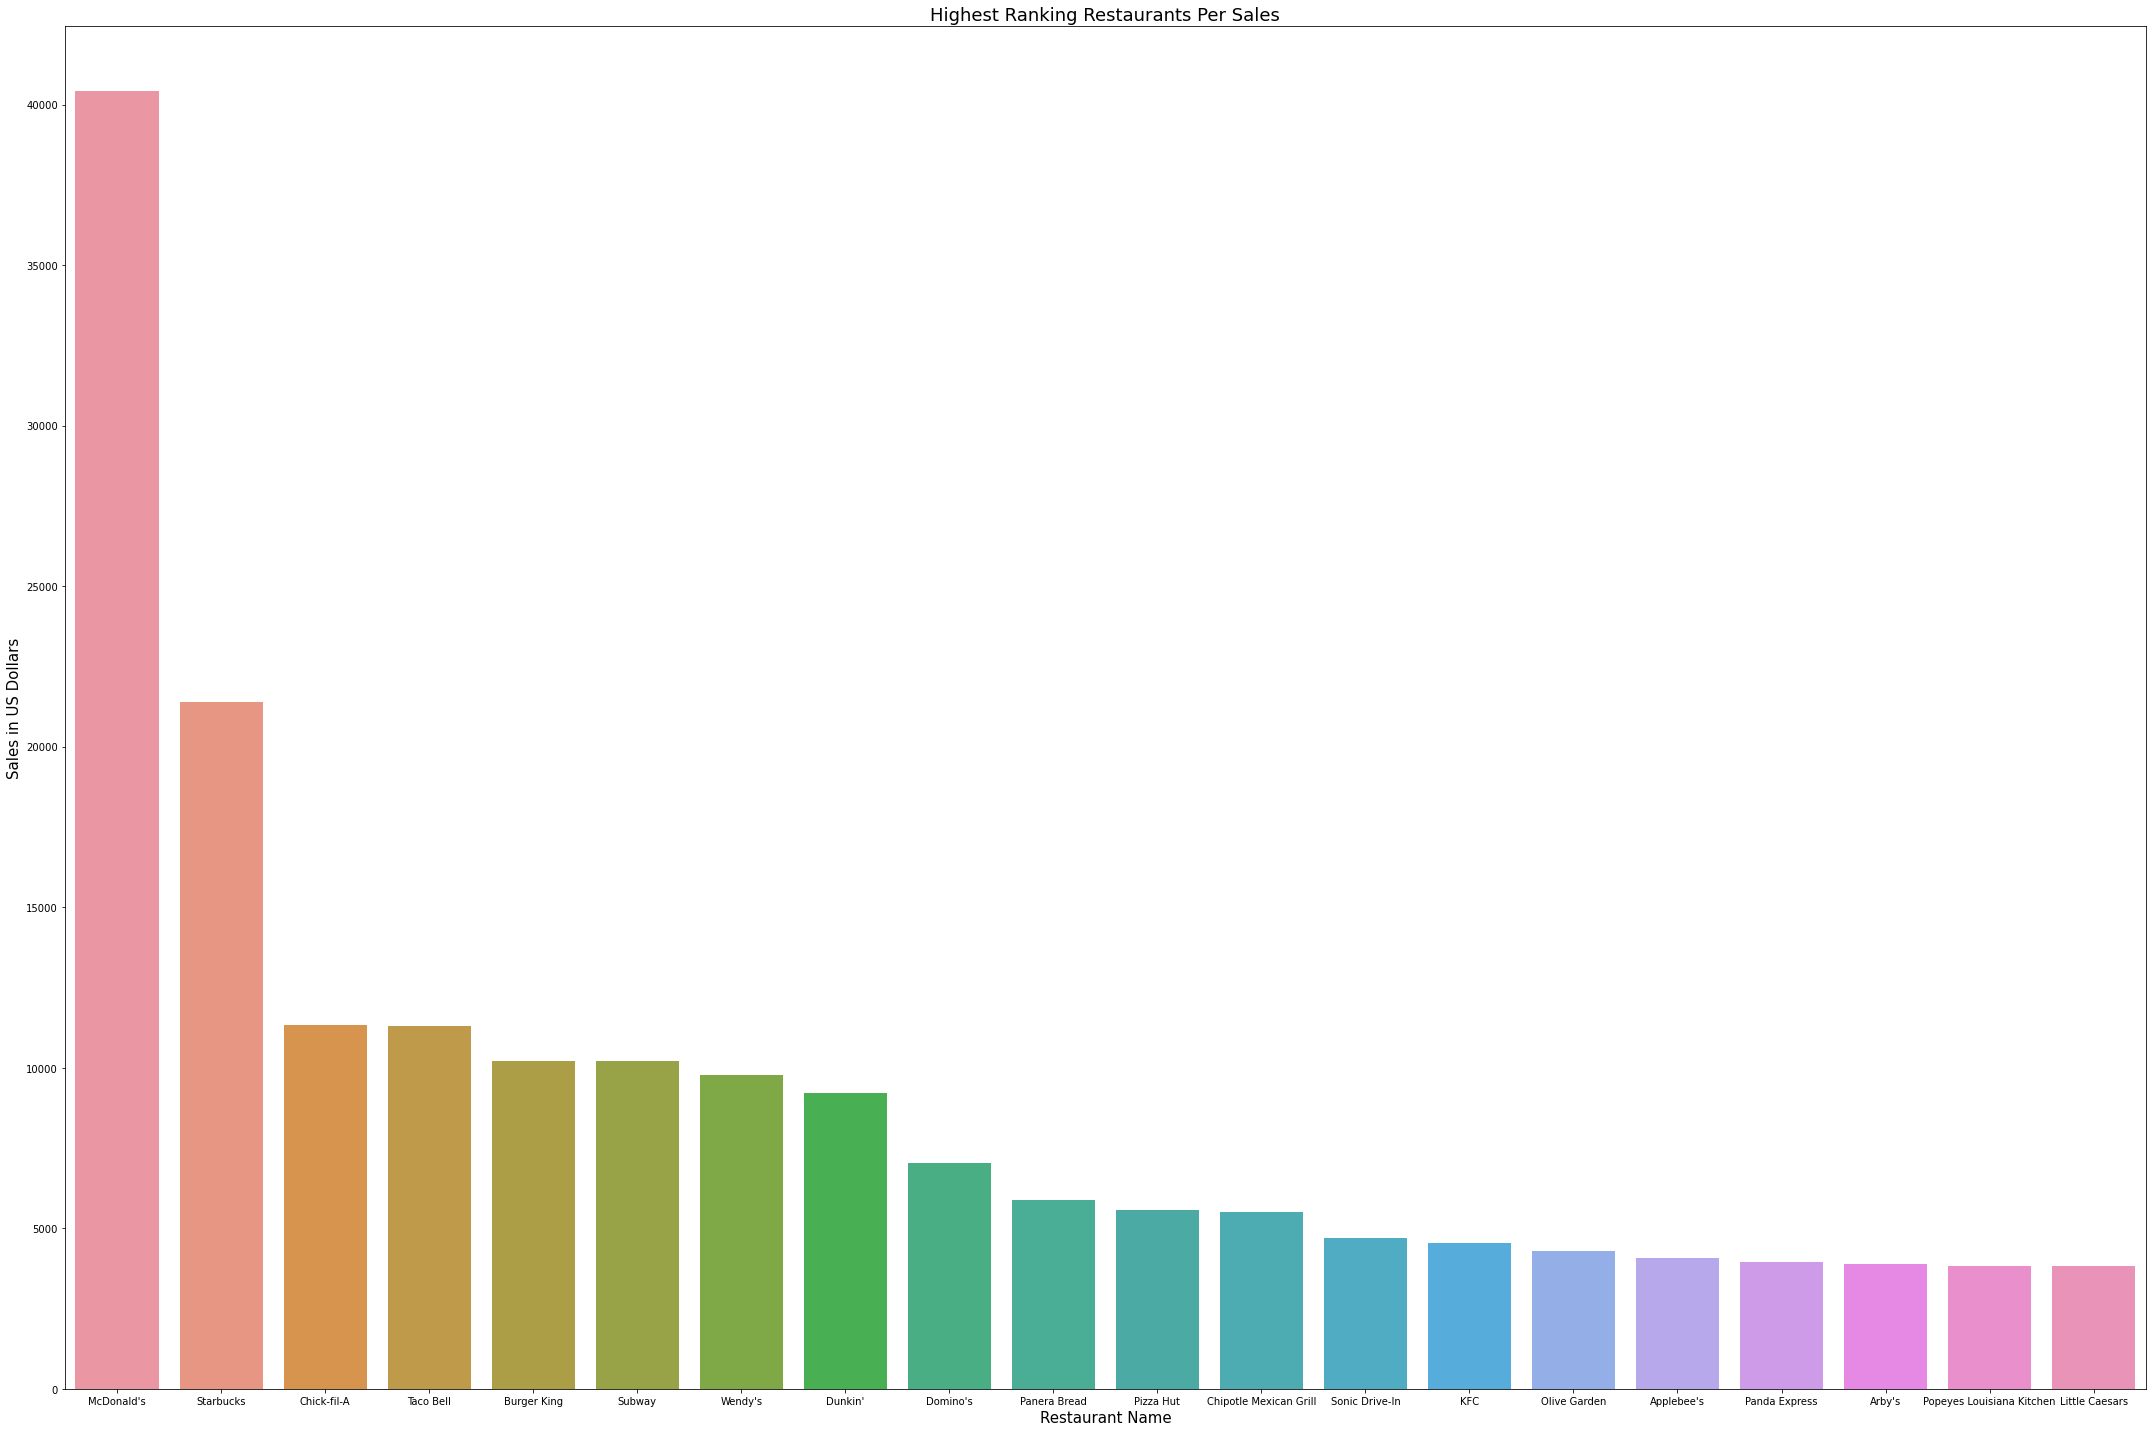

In [13]:
plt.figure(figsize=(30,20))
# make barplot
sns.barplot(x='Restaurant', y="Sales", data=top20)
# set labels
plt.xlabel("Restaurant Name", size=15)
plt.ylabel("Sales in US Dollars", size=15)
plt.title("Highest Ranking Restaurants Per Sales", size=18)
plt.tight_layout()

__Conclusion From Data__

MacDonald's ranking highest with over 40,000 in sales. Almost double the amount of the 2nd ranking restuarant of Starbucks with around 21,000 in sales. And over triple the amount of the 3rd ranking restaurant of Chick-Fil-A with around 11,300 in sales. 

In [45]:
# Explore the lowest ranking resaurants
bottom20 = top250[230:250]
bottom20

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
230,231,Old Country Buffet/HomeTown Buffet,142,-18.8,49,-24.6%,Family Casual
231,232,Great American Cookies,142,2.7,368,2.2%,Snack
232,233,Nobu,139,9.4,17,13.3%,Asian
233,234,BurgerFi,138,3.0,112,7.7%,Burger
234,235,Mission BBQ,136,25.0,90,21.6%,BBQ
235,236,Walk-On's Sports Bistreaux,133,27.8,33,37.5%,Sports Bar
236,237,The Coffee Bean & Tea Leaf,133,-2.1,282,-0.7%,Coffee Cafe
237,238,Yogurtland,132,-2.6,267,-2.2%,Frozen Desserts
238,239,Daylight Donuts,132,2.2,415,0.2%,Snack
239,240,WaBa Grill,132,3.7,191,0.0%,Asian/Noodle


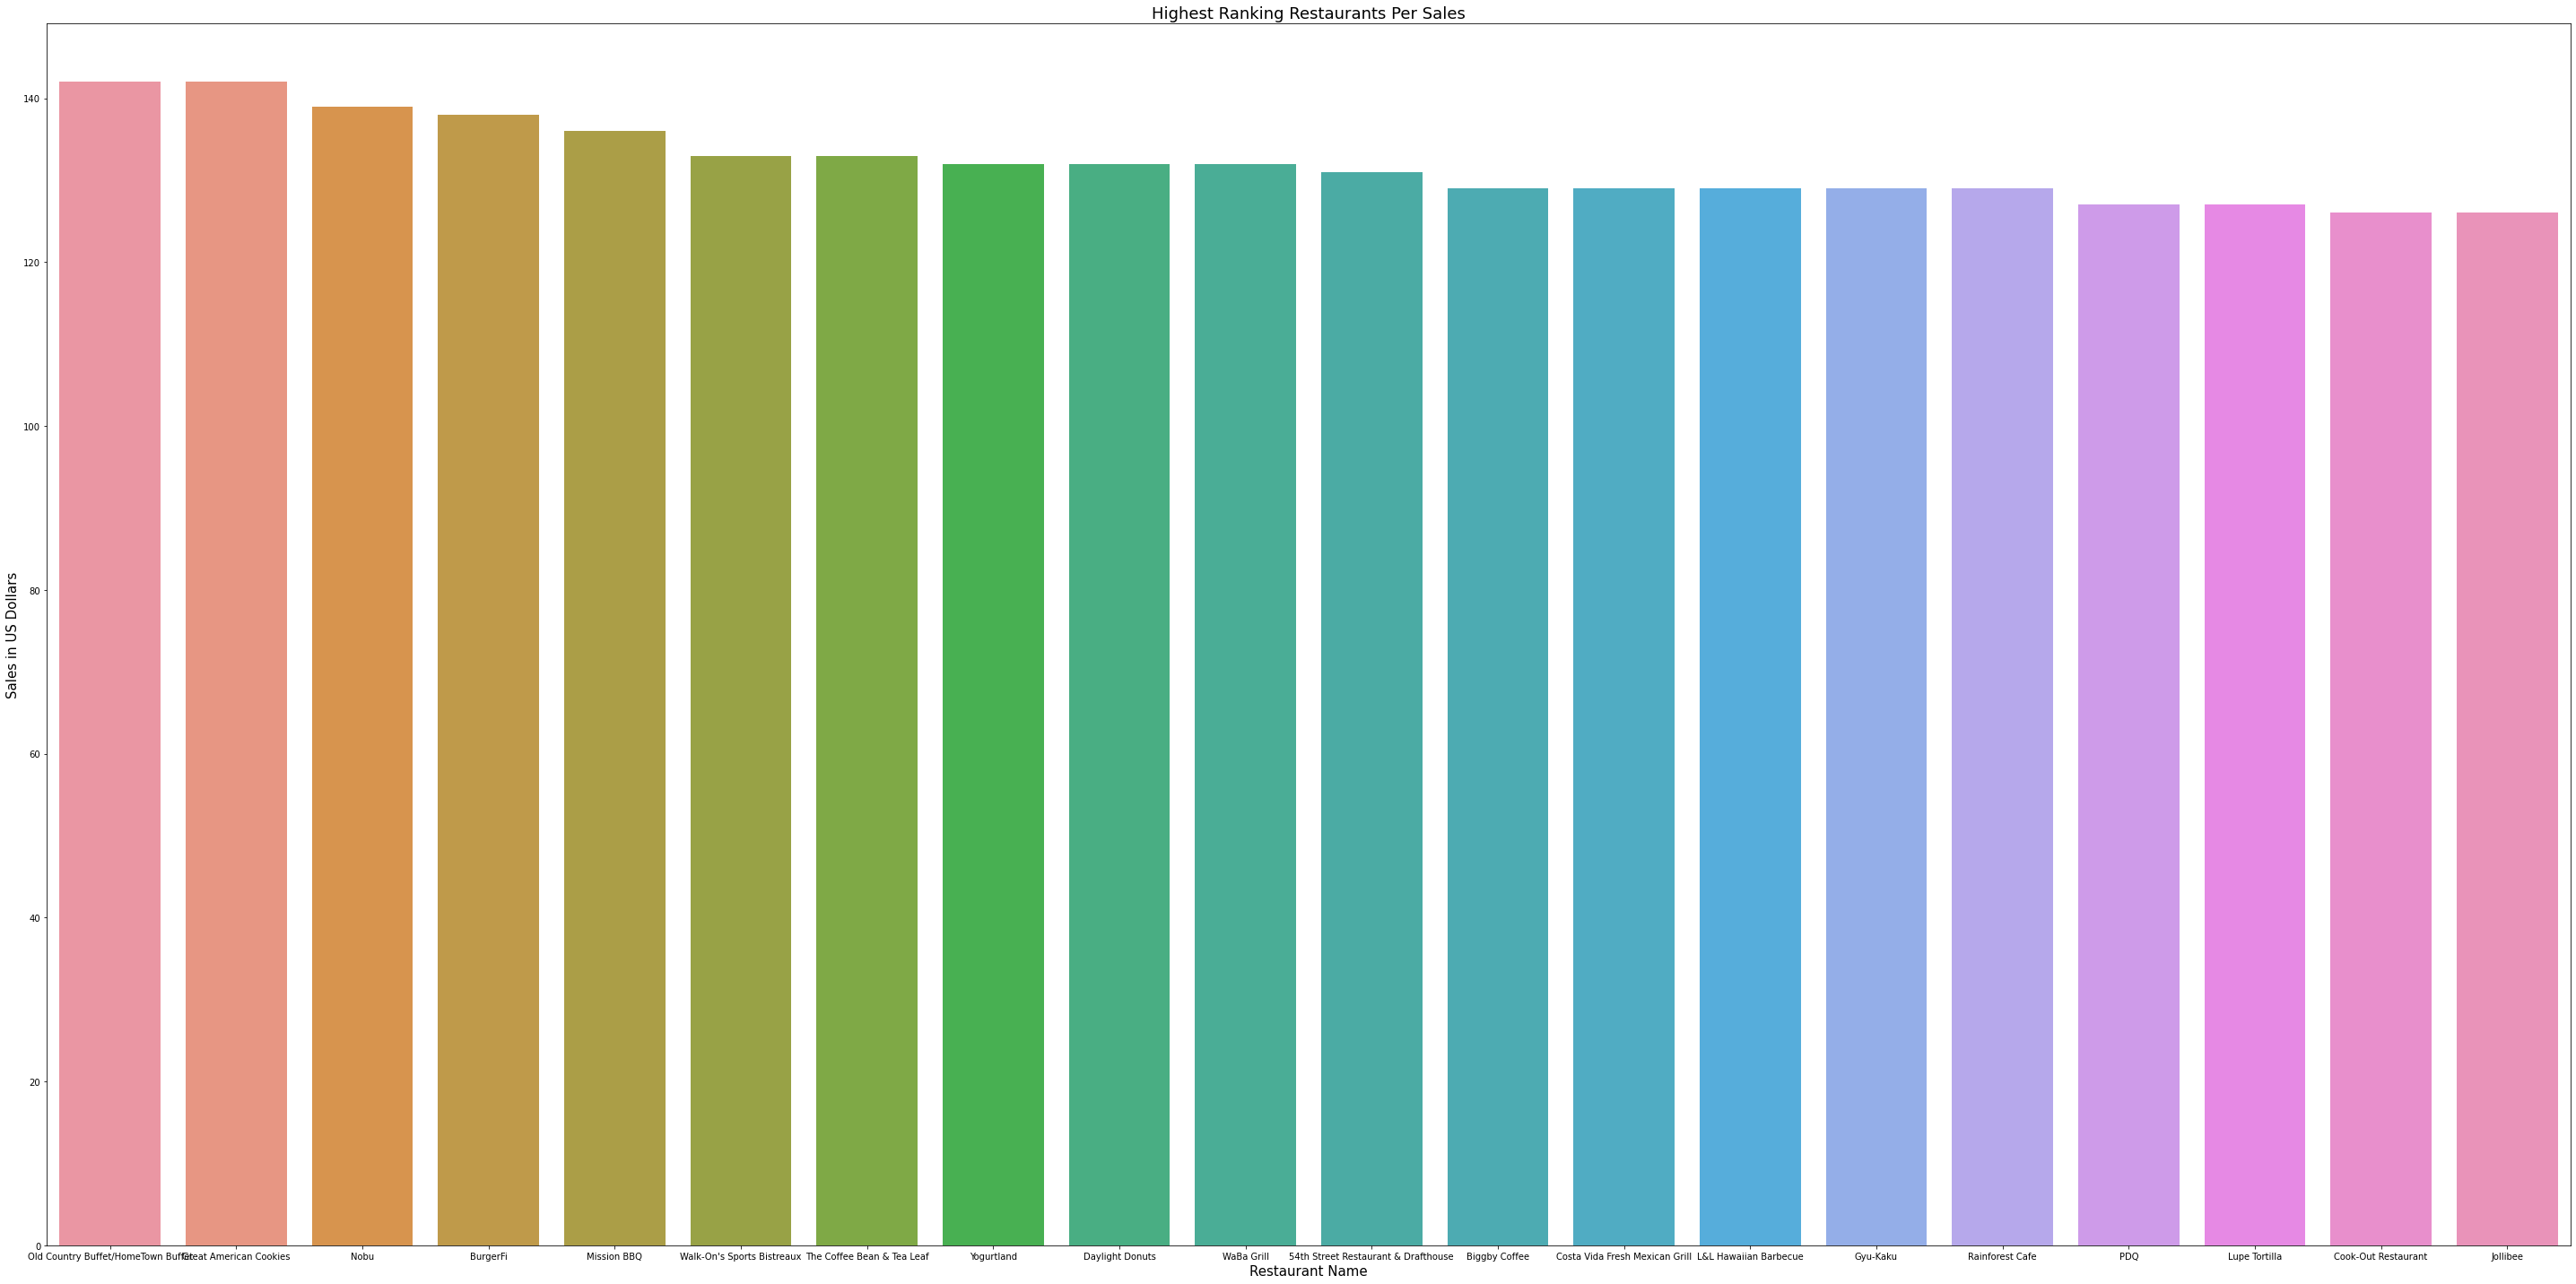

In [48]:
#Bottom Ranking
plt.figure(figsize=(40,20))
# make barplot
sns.barplot(x='Restaurant', y="Sales", data=bottom20)
# set labels
plt.xlabel("Restaurant Name", size=15)
plt.ylabel("Sales in US Dollars", size=15)
plt.title("Highest Ranking Restaurants Per Sales", size=18)
plt.tight_layout()

----

## Let's explore the Type of service/Food type and Sales 

In [14]:
top250.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2%,Quick Service & Burger


In [15]:
top250['Segment_Category'].unique().sum()

'Quick Service & BurgerQuick Service & Coffee CafeQuick Service & ChickenQuick Service & MexicanQuick Service & SandwichQuick Service & PizzaFast Casual & Bakery CafeFast Casual & MexicanCasual Dining & Italian/PizzaCasual Dining & Varied MenuFast Casual & Asian/NoodleQuick Service & Frozen DessertsCasual Dining & Sports BarFamily Dining & Family StyleCasual Dining & SteakCasual Dining & SeafoodFast Casual & SandwichFast Casual & ChickenQuick Service & Family CasualFast Casual & BurgerCasual Dining & AsianQuick Service & SnackSteakQuick Service & BeverageSports BarQuick Service & SeafoodQuick Service & Bakery CafeFast Casual & PizzaFine Dining & SteakMexicanVaried MenuChickenItalian/PizzaPizzaSeafoodFrozen DessertsCoffee CafeBBQSandwichBakery CafeBurgerAsianFamily StyleAsian/NoodleFamily CasualSnackHealthyEthnic'

In [36]:
groupSeg = top250.groupby('Segment_Category').sum().reset_index()
groupSeg = groupSeg.sort_values('Sales', ascending=False).reset_index()

In [37]:
fig = px.pie(groupSeg.head(10), values='Sales', names='Segment_Category',template="seaborn")
fig.update_layout(title=' Top 10 Sales Based on the Segment_Category')

In [18]:
# Remove the & sign and just focus on the type/style of food served 
splitcategory = top250["Segment_Category"].str.split("&", n = -1, expand = True)

In [19]:
top250['Segment_Category']=splitcategory[0]

In [20]:
px.bar(top250.Segment_Category.value_counts())

__Conclusion From Data__

- Quick Service is the highest ranking. It more than doubles the 2nd ranking of casual dining. 


----

# Lets investigate the Year Over Year Sales for Type/Style of Food 

In [35]:
# Groupby function to see sales and category of food/type of service 
groupedyoys = top250.groupby('Segment_Category').sum().reset_index()
groupedyoys = groupedyoys.sort_values('YOY_Sales', ascending=False).reset_index()
fig = px.pie(groupedyoys.head(10), values='YOY_Sales', names='Segment_Category',template="seaborn")
fig.update_layout(title=' Top 10 Year over Year increase For Segment_Category')
fig.update_traces(textposition='inside', textinfo='value')